# 获取数据

In [23]:
import sklearn.datasets
#dir(sklearn.datasets)
#load_iris # classification
data = sklearn.datasets.load_boston() # regression
# dir(data)

feats = data["data"]
labs = data["target"]

# 划分验证集和训练集

In [78]:
# from sklearn.cross_validation import train_test_split #移动地方了
from sklearn.model_selection import train_test_split
train_feats, val_feats, train_labs, val_labs = train_test_split(feats, labs, test_size = 0.2, random_state = 0) #shift+Tab: view document

# 模型的训练和表现

In [108]:
import matplotlib.pyplot as plt
import numpy as np
def fit_and_perform(model, train_feats, train_labs, val_feats, val_labs):
    model.fit(train_feats, train_labs)
    train_score = model.score(train_feats, train_labs)
    train_res = model.predict(train_feats)
    val_score = model.score(val_feats, val_labs)
    val_res = model.predict(val_feats)
    plt.figure(figsize=(20,8))
    plt.subplot(121)
    plt.scatter(train_labs,train_res, color = 'r', s = 20)
    plt.plot([0, 60],[0, 60])
    plt.title('score: %f'%train_score)
    plt.subplot(122)
    plt.scatter(val_labs, val_res, color = 'r', s = 20)
    plt.plot([0, 60],[0, 60])
    plt.title('score: %f'%val_score)
    plt.show()
    print("RMSE:",np.mean((val_res-val_labs)**2)**0.5)

# 模型拟合

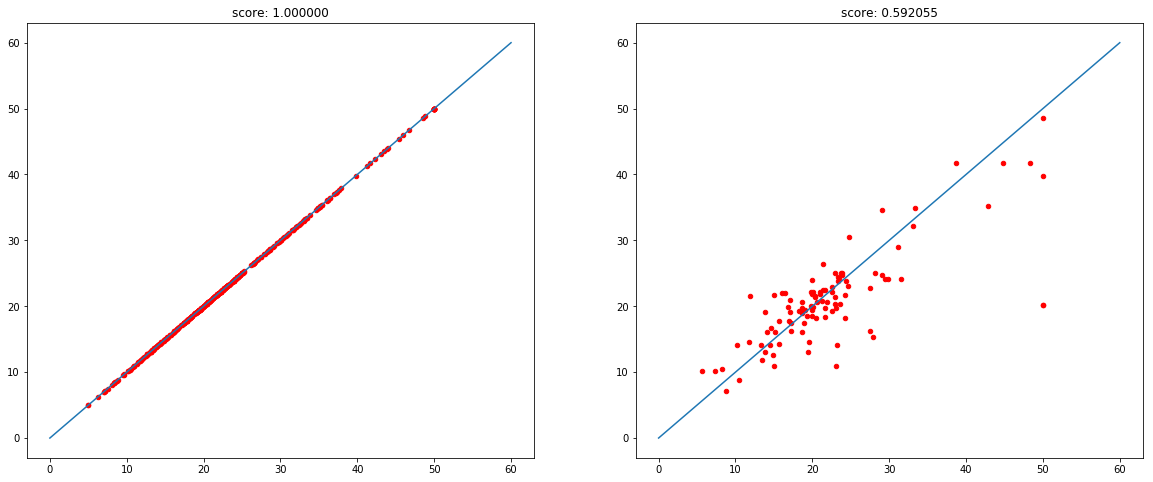

RMSE: 5.763534795013676


In [120]:
from sklearn import tree
from sklearn import linear_model
from sklearn import svm
from sklearn import neighbors
from sklearn import ensemble
from sklearn.tree import ExtraTreeRegressor
from xgboost.sklearn import XGBRegressor
# model = tree.DecisionTreeRegressor() # 决策树
# model = linear_model.LinearRegression() #线性回归
# model = svm.SVR() # SVM
# model = neighbors.KNeighborsRegressor() # KNN
# model = ensemble.RandomForestRegressor(n_estimators=20) # 使用20个决策树的rf
# model = ensemble.AdaBoostRegressor(n_estimators=50) # 使用50个决策树的adaboost
# model = ensemble.GradientBoostingRegressor(n_estimators=100) # 这里使用100个决策树的GBRT
# model_BaggingRegressor = ensemble.BaggingRegressor() #Bagging
# model = ExtraTreeRegressor() # 极端随机树
fit_and_perform(model, train_feats, train_labs, val_feats, val_labs)

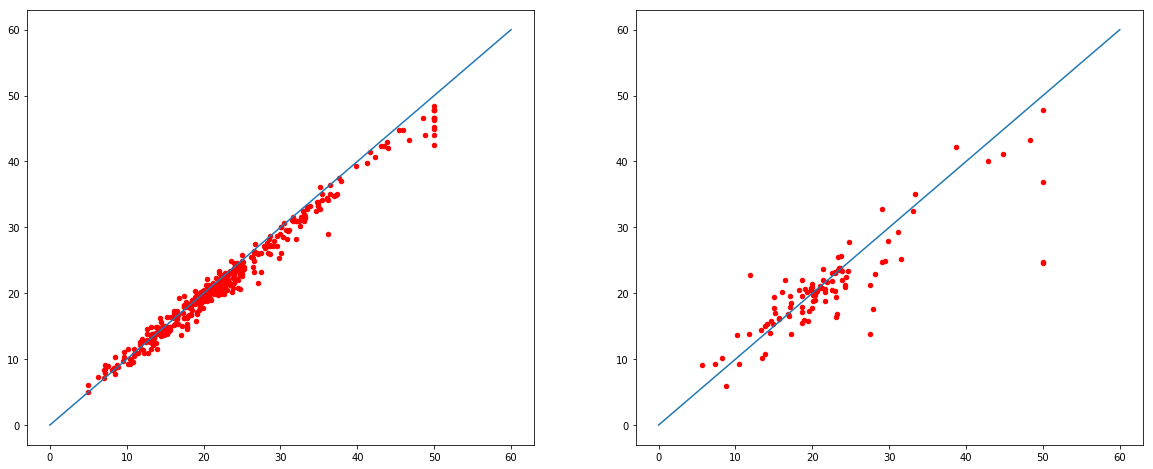

RMSE: 4.968978977680821


In [127]:
import xgboost as xgb
param = {'bst:max_depth':2, 'bst:eta':1, 'silent':1, 'objective':'reg:linear' }
param['nthread'] = 4
plst = param.items()
# plst += [('eval_metric', 'auc')] # Multiple evals can be handled in this way
# plst += [('eval_metric', 'ams@0')]

dtrain = xgb.DMatrix(train_feats, label=train_labs)
num_round = 10
model = xgb.train(plst, dtrain, num_round)
dtest = xgb.DMatrix(train_feats)
train_res = model.predict(dtest)
dtest = xgb.DMatrix(val_feats)
val_res = model.predict(dtest)
plt.figure(figsize=(20,8))
plt.subplot(121)
plt.scatter(train_labs,train_res, color = 'r', s = 20)
plt.plot([0, 60],[0, 60])
plt.subplot(122)
plt.scatter(val_labs, val_res, color = 'r', s = 20)
plt.plot([0, 60],[0, 60])
plt.show()
print("RMSE:",np.mean((val_res-val_labs)**2)**0.5)

| model | train_score | val_score | val_rmse |
| - | - | - | - |
| dt | 1.0000| 0.6310 | 5.474 |
| lr | 0.7729 | 0.5892 | 5.783 | 
| SVM | 0.1548 | 0.0046 | 9.003 |
| KNN | 0.7130 | 0.3645 | 7.193 |
| rf | 0.9797 |0.7054 | 4.898 |
| adaboost | 0.9797 |0.7054 | 4.898 |
| adaboost | 0.9231 |0.6679 | 5.200 |
| GBRT | 0.9815 |0.7674 | 4.352 |
| Bagging | 0.9815 |0.7672 | 4.354 |
| et | 1.0000 |0.6666 | 5.211 |
| xgb | - | - | 4.969 |